<a href="https://colab.research.google.com/github/Guywell/229352-StatisticalLearning/blob/main/229352_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [22]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [23]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [24]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [25]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

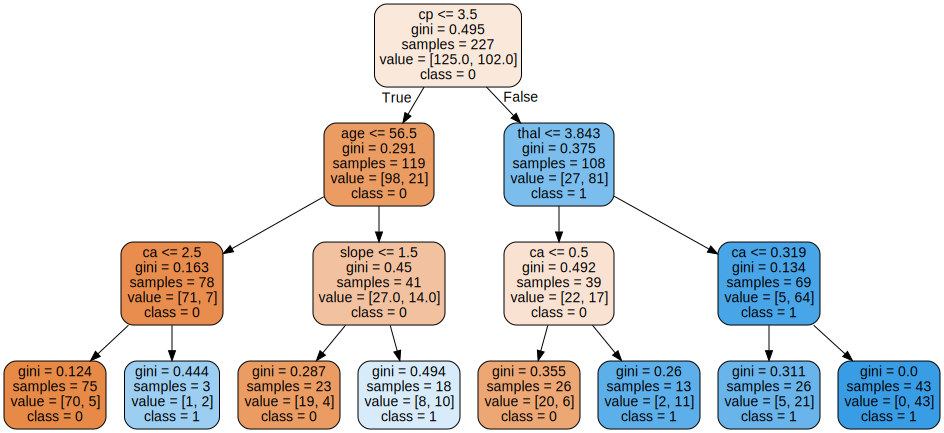

In [26]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [27]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [28]:
clf = DecisionTreeClassifier()

In [29]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        39
           1       0.77      0.73      0.75        37

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [30]:
forest = RandomForestClassifier(n_estimators=200,max_depth=6)

forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        39
           1       0.83      0.78      0.81        37

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.82        76
weighted avg       0.82      0.82      0.82        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
# > 0.75     4,6,20

In [32]:
from sklearn.metrics import accuracy_score, make_scorer, f1_score

# Define pipelines for each model
dt_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', DecisionTreeClassifier())])
bagging_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', BaggingClassifier(estimator=DecisionTreeClassifier()))])
forest_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', RandomForestClassifier())])

# Define parameter grids for each model
dt_params = {
    'clf__max_depth': [3, 6, 9, 12, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

bagging_params = {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__max_samples': [0.6, 0.8, 1.0],
    'clf__estimator__max_depth': [3, 6, 9, None]
}

rf_params = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [6, 9, 12, None],
    'clf__min_samples_split': [2, 5, 10]
}

# Create f1_macro scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Perform Grid Search with Cross-Validation for each model
dt_grid = GridSearchCV(dt_pipeline, dt_params, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)

bagging_grid = GridSearchCV(bagging_pipeline, bagging_params, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro', cv=5)
bagging_grid.fit(X_train, y_train)

forest_grid = GridSearchCV(forest_pipeline, rf_params, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro', cv=5)
forest_grid.fit(X_train, y_train)

# Store the best estimators and results
best_models = {
    'Decision Tree': {'estimator': dt_grid.best_estimator_, 'results': dt_grid.cv_results_},
    'Bagging': {'estimator': bagging_grid.best_estimator_, 'results': bagging_grid.cv_results_},
    'Random Forest': {'estimator': forest_grid.best_estimator_, 'results': forest_grid.cv_results_}
}

In [33]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Evaluate each model on the test set and print the results
for model_name, model_info in best_models.items():
    best_estimator = model_info['estimator']
    y_pred = best_estimator.predict(X_test)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"F1-macro on test set: {f1_macro:.4f}")
    print(f"Accuracy on test set: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 20)

--- Decision Tree ---
F1-macro on test set: 0.6557
Accuracy on test set: 0.6579

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        39
           1       0.67      0.59      0.63        37

    accuracy                           0.66        76
   macro avg       0.66      0.66      0.66        76
weighted avg       0.66      0.66      0.66        76

--------------------
--- Bagging ---
F1-macro on test set: 0.7889
Accuracy on test set: 0.7895

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.80      0.76      0.78        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

--------------------
--- Random Forest ---
F1-macro on test set: 0.8417
Accuracy on test set: 0.8421

Classification Report

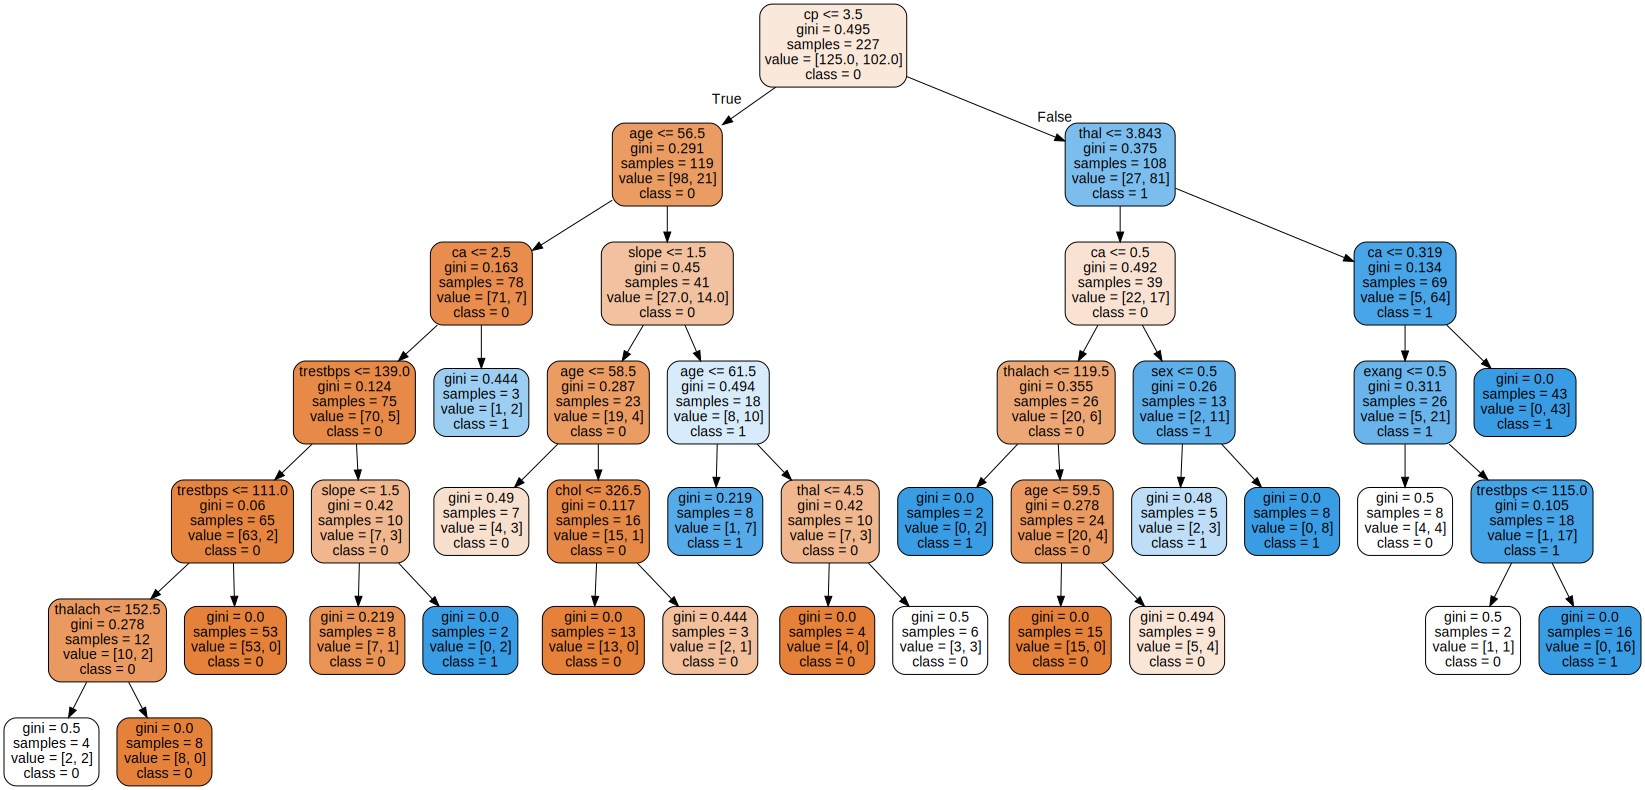

In [35]:
import graphviz
from sklearn.tree import export_graphviz

# Get the best Decision Tree estimator from the grid search
best_dt_model = best_models['Decision Tree']['estimator']

# Access the DecisionTreeClassifier from the pipeline
best_dt_classifier = best_dt_model.named_steps['clf']

# Export the decision tree to a DOT format
dot_data = export_graphviz(best_dt_classifier,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

# Create a Graphviz source object and display it
graph = graphviz.Source(dot_data)
graph

In [ ]:
##################

-best model is Random Forest
F1-macro on test set: 0.8417
Accuracy on test set: 0.8421

-เลือก Random Forest: โดยปรับจำนวน, ความลึกสูงสุดแต่ละต้น และจำนวนตัวอย่างน้อยที่สุดในการแยกโหนดในแต่ละต้นไม้

